In [ ]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_zero_large_strong_drive',
    LOG_FILE='logs/extension_by_spontaneous_replay_large_strong_drive.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=10, PROBE_TIME=200,
    ALPHA=0,
    G_XS=np.arange(1., 1.5, 0.05),
    G_WS=np.arange(0.1, 1.5, 0.05),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

In [ ]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_low_large_strong_drive',
    LOG_FILE='logs/extension_by_spontaneous_replay_large_strong_drive.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=10, PROBE_TIME=200,
    ALPHA=1,
    G_XS=np.arange(1., 1.5, 0.05),
    G_WS=np.arange(0.1, 1.5, 0.05),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

In [ ]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_medium_large_strong_drive',
    LOG_FILE='logs/extension_by_spontaneous_replay_large_strong_drive.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=10, PROBE_TIME=200,
    ALPHA=2,
    G_XS=np.arange(1., 1.5, 0.05),
    G_WS=np.arange(0.1, 1.5, 0.05),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

In [ ]:
import numpy as np
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='alpha_high_large_strong_drive',
    LOG_FILE='logs/extension_by_spontaneous_replay_large_strong_drive.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=10, PROBE_TIME=200,
    ALPHA=10,
    G_XS=np.arange(1., 1.5, 0.05),
    G_WS=np.arange(0.1, 1.5, 0.05),
    NOISE_STDS=np.arange(0.01, 0.31, 0.01),
    N_TRIALS=1000, LOW_PROB_THRESHOLD=0.02, LOW_PROB_MIN_TRIALS=30)

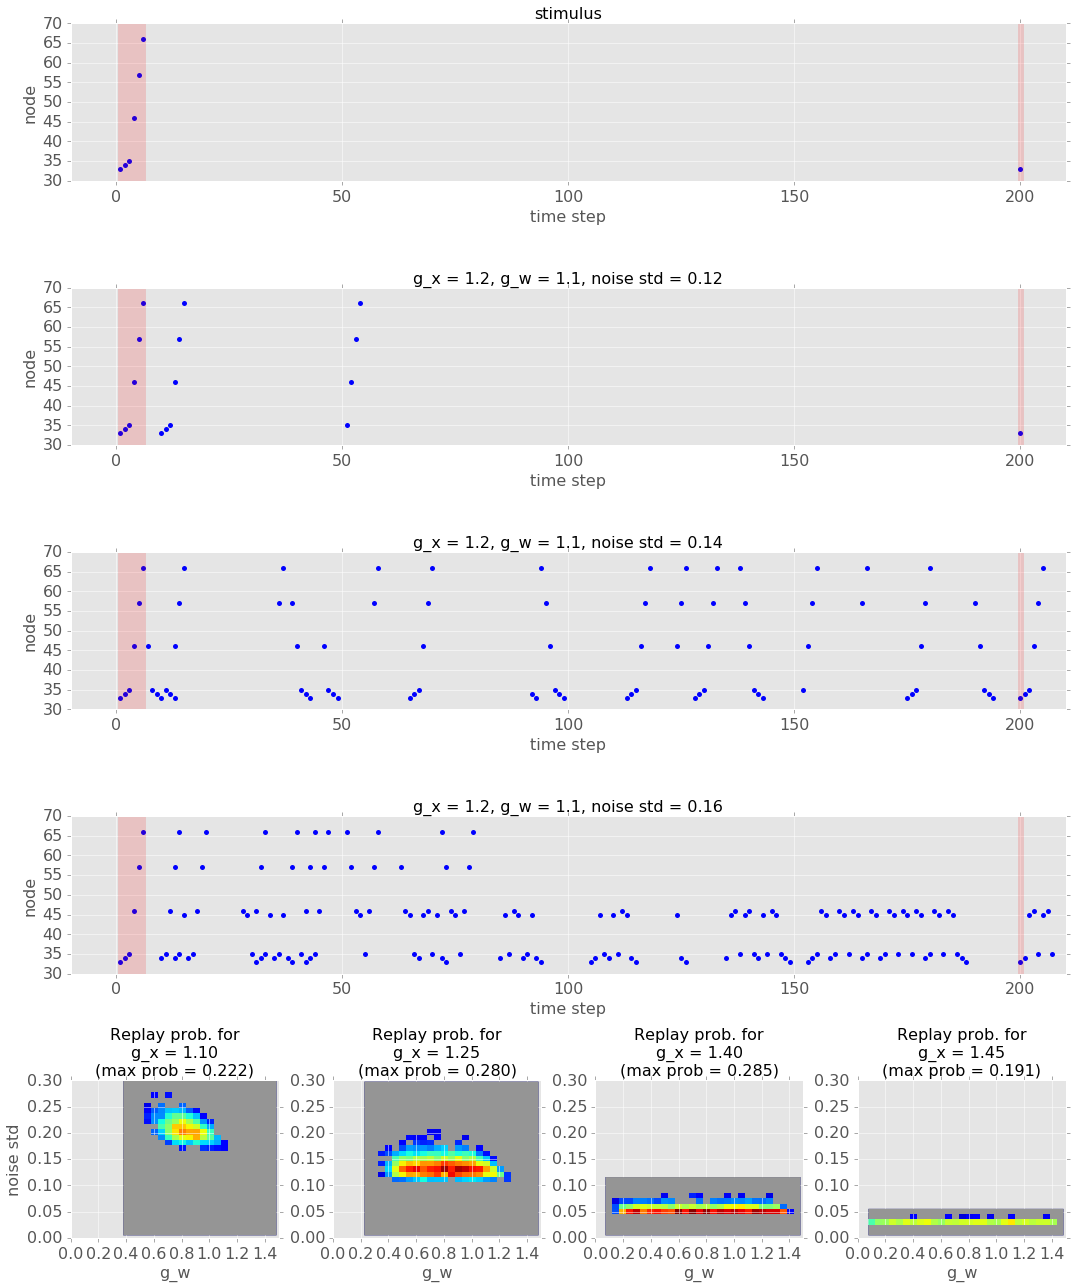

In [7]:
%matplotlib inline
from figures.final_paper import extension_by_spontaneous_replay

extension_by_spontaneous_replay(
    SEEDS_EXAMPLE=[0, 1, 2], NOISES_EXAMPLE=[0.12, 0.14, 0.16],
    G_W=1.1, G_X=1.2, GROUP_NAME='alpha_low_large', G_XS=[1.1, 1.25, 1.4, 1.45],
    X_LIM=(0, 1.5), Y_LIM=(0, 0.3));

### Fig 4: Noise-driven spontaneous replay
Top row: sequence of node-specific stimuli applied to bidirectional hexagonal lattice network. The initial stimulus sequence occurs from time steps 1-7 and the replay probe at time step 200.

Rows 2-4: response of network with low, medium, and high level of noise added when $g_x = 0.12$ and $g_w = 1.1$ (and $T_x = 50$). Only the network with a medium level of noise replays the sequence correctly upon the replay probe. 

Bottom row: probability of correct probe-triggered replay at $t=200$ as a function of $g_w$ and noise level for four different $g_x$'s. Hotter colors represent higher correct replay probability, and dark gray pixels correspond to simulations that were ended early because the probability of correct replay remained less than 0.02 after 30 trials.

### Observations and interpretations

This figure demonstrates that spontaneous noise can extend the duration over which the memory trace of a stimulus-driven sequence can be maintained via activation-triggered hyperexcitability. Further, it illustrates a key trade-off between memory integrity vs. memory maintenance as a function of the strengths of several different features of the network.

1. Spontaneous replay, i.e., "rehearsal", is required for the memory of the sequence to extend beyond the timescale of lingering excitability. If the noise level is too low, not enough sponataneous replay occurs, and hence the memory of the sequence quickly fades. If the noise level is too high, however, there is an increased chance that the sequence replayed during rehearsal will deviate from the true sequence, since incorrect nodes that downstream of the early nodes in the sequence have a higher probability of activating in place of the correct nodes. This implies that there is an optimal noise level that will extend the uncorrupted memory of the original sequence into the future with the highest probability, as shown in 3rd panel from the top with noise std = 0.14.

2. The optimal noise level depends on $g_x$. When $g_x$ increases, the optimal noise level decreases. This makes sense, since a higher $g_x$ means that hyperexcitable nodes are closer to threshold and should require less noise to reach it.

3. A bit more subtle is that the maximum correct probe-triggered replay probability achievable (i.e., at the optimal noise level and $g_w$) depends on $g_x$. At first, as $g_x$ increases towards the threshold level, this maximum replay probability increases. However, when it begins to get too close to the threshold, this maximum probability decreases again. This implies that a $g_x$ near but not too near threshold optimizes the sequence replay probability at future time beyond the timescale of lingering hyperexcitability.

4. The sensitivity of successful probe-triggered replay probability to $g_w$ is also strongly dependent on $g_x$, and in fact decreases as $g_x$ increases. This suggests that having a high $g_x$ makes correct replay less dependent on the connection strengths between the nodes in the network.

This figure thus demonstrates several of the trade-offs that affect sequence replay via activation-triggered hyperexcitability and suggests that this mechanism can maintain recallable sequence memories for extended durations most robustly when the hyperexcitability of the previously activated nodes is maintained as near threshold as possible without being so near that the noise required for rehearsal also causes disordered spontaneous activation of the hyperexcitable nodes.